In [2]:
# preamble
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
from scipy import interpolate

plt.style.use(['science', 'ieee'])

# Question 1
## a)
We can approximate a derivative using the central difference. We need two points - one to the left and one to the right:
\begin{equation*}
f'(x) = \frac{f(x+\delta)-f(x-\delta)}{2\delta},
\end{equation*}
or
\begin{equation*}
f'(x) = \frac{f(x+2\delta)-f(x-2\delta)}{4\delta},
\end{equation*}

The goal of this problem is to come up with an approximation to a derivative using four points. I will use the points $x\pm\delta$ and $x\pm 2\delta$ to approximate the derivative.

Let's start by Talor expand our function $f(x)$ around $x=0$. For $f(x)$ evaluated at the points $x\pm\delta$ I have:

$$f(x\pm\delta) = f(x) \pm \delta f'(x) + \frac{1}{2}\delta^2f''(x) \pm \frac{1}{3!}\delta^3f'''(x) + \frac{1}{4!}\delta^4f^{(4)}(x)\pm\frac{1}{5!}\delta^5f^{(5)}(x)+...$$

Similarly, for $f(x)$ evaluated at the points $x\pm 2\delta$: 

$$f(x\pm 2\delta) = f(x) \pm 2\delta f'(x) + \frac{2^2}{2}\delta^2f''(x) \pm \frac{2^3}{3!}\delta^3f'''(x) + \frac{2^4}{4!}\delta^4f^{(4)}(x)\pm\frac{2^5}{5!}\delta^5f^{(5)}(x)+...$$


This looks like a mess, but we can cancel out some terms. Notice that all the non $\pm$ terms will go away if we do $f(x+\delta) - f(x-\delta)$ and $f(x+2\delta)-f(x-2\delta)$. This yields:

\begin{equation}
f(x+\delta) - f(x-\delta) \approx 2\delta f'(x) + \frac{1}{3}\delta^3f'''(x) + \frac{1}{60}\delta^5f^{(5)}(x),
\end{equation}

and

\begin{equation}
f(x+2\delta)-f(x-2\delta) = 4\delta f'(x) + \frac{8}{3}\delta^3f'''(x) + \frac{8}{15}\delta^5f^{(5)}(x),
\end{equation}

where I have truncated after the 5th order. This looks promising - we have a term with $f'(x)$, which we want to compute, a term with $\delta^3$ and a term with $\delta^5$. If we can cancel the $\delta^3$ term we would be left with an "error" term that goes as $\delta^5$, which would be very small for $\delta << 1$. Let's try to find a linear combination of Equations 1 and 2 that allows for such a cancellation. In math lingo, we want some $a, b,$ and $c \in \mathbb{R}$ such that:
\begin{equation}
a\left(\frac{f(x+\delta)-f(x-\delta)}{2\delta}\right) + b\left(\frac{f(x+2\delta)-f(x-2\delta)}{4\delta}\right) = \delta f'(x) + c\delta^5f^{(5)}(x),
\end{equation}
will result in a cancellation of the $\delta^3$ terms.
Plugging Equations 1 and 2 in this gives:
\begin{align*}
a \left(f'(x) + \frac{1}{6}\delta^2f'''(x) + \frac{1}{120}\delta^4f^{(5)}(x)\right) + b\left( f'(x) + \frac{2}{3}\delta^2f'''(x) + \frac{2}{15}\delta^4f^{(5)}(x)\right) \\
= \delta f'(x) + c\delta^5f^{(5)}(x).
\end{align*}

This gives the system of equations: 
\begin{equation*}
\frac{a}{6} + \frac{2b}{3} = 0
\end{equation*}

\begin{equation*}
a+b = 1
\end{equation*}

Which has solutions $a = 4/3$ and $b = -1/3$, and this sets $c$ to be $-1/30$. Plugging these values in Equation (3) yields:
\begin{equation*}
\frac{4}{3}\left(\frac{f(x+\delta)-f(x-\delta)}{2\delta}\right) - \frac{1}{3}\left(\frac{f(x+2\delta)-f(x-2\delta)}{4\delta}\right) = f'(x) - \frac{1}{30}\delta^4f^{(5)}(x),
\end{equation*}
and we can solve for $f'(x)$:
\begin{equation}
f'(x) = \frac{8(f(x+\delta)-f(x-\delta))- (f(x+2\delta)-f(x-2\delta))}{12\delta} +\frac{1}{30}\delta^4f^{(5)}(x).
\end{equation}

This expression contains two terms, the first of which is simply our estimate of $f'(x)$, while the second, $\Delta = \frac{1}{30}\delta^4f^{(5)}(x)$, is the truncation error.

## b)

In part a) we found that the error on our approximation of the first derivative using 4 points scales as $\delta^4 f^{(5)}(x)$. Does this mean we should take the smallest $\delta$ possible and enjoy an error arbitrarily close to 0? Well yes, but actually no. It is true that reducing $\delta$ will reduce the error, up until $\delta$ is too small for the computer and roundoff error kicks in. There is then an optimal value of $\delta$ small enough that the truncation error is small, but big enough so that roundoff error does not overpower truncation error. To derive this optimal value, we need to take into account machine precision. In general, for a finite difference equation like we have above, we get a roundoff error that goes like $\varepsilon gf(x)/\delta$, where $\varepsilon\approx2.22\times 10^{-16}$ is the machine's precision for float64 in Python. This is the samlles difference between two numbers that the computer can distinguish using floating-point arithmetic. We also have a constant $g$ that we can take to be of order unity. Taking into account rounding error, we have a new error term:
$$\Delta = \frac{1}{30}\delta^4f^{(5)}(x)+\frac{\varepsilon}{\delta}f(x).$$

To find the optimal $\delta$, let's minimize $\Delta$, i.e. take its derivative with respect to $\delta$, set it equal to zero, and solve for $\delta$.

$$\frac{\partial\Delta}{\partial\delta}=\frac{4}{30}\delta^3f^{(5)}(x)-\frac{\varepsilon}{\delta^2}f(x) = 0.$$

Solving for $\delta$ gives
$$\delta \approx \left(\frac{15\varepsilon f(x)}{2f^{(5)}(x)}\right)^{1/5}$$

This is great, but what about $f^{(5)}$? We are trying to approximate $f'$, but in order to do so it seems like we need the knowledge of the fifth derivative! This is a bit non-sensical - if we don't know the first derivative, there is no way we can know about the fifth derivative. To remedy to this situation we just have to also approximate $f^{(5)}$ using finite difference methods. In general, the approximation to the $n^{th}$ derivative using central difference is given by
$$f^{(n)} (x) \approx \sum_{i=0}^n(-1)^i\begin{pmatrix} n \\
i 
\end{pmatrix}\frac{f(x+(n/2 -i)\beta)}{\beta^n}.$$

Taken from: https://en.wikipedia.org/wiki/Finite_difference. For the fifth derivative, we then have
$$f^{(5)} \approx \frac{-1/2f(x-3\beta)+2f(x-2\beta)-5/2f(x-\beta)+5/2f(x+\beta)-2f(x+2\beta)+1/2f(x+3\beta)}{\beta ^5}.$$

Great, but we have to choose an optimal $\beta$ for this too - it never ends! We can solve for the optimal $\beta$ like we did for $\delta$ above, but this will lead to yet another derivative we need to approximate, hence another parameter that we need to optimize, and so on. However, we can just set $\beta$ to a small value (but not too small) and use that to estimate the optimal $\delta$, which in turn is used to estimate $f'(x)$, without affecting too much the error on $f'(x)$. Guessing a value of $\beta$ is much better than guessing a value of $\delta$. 

Let's code everything up to check all of this.

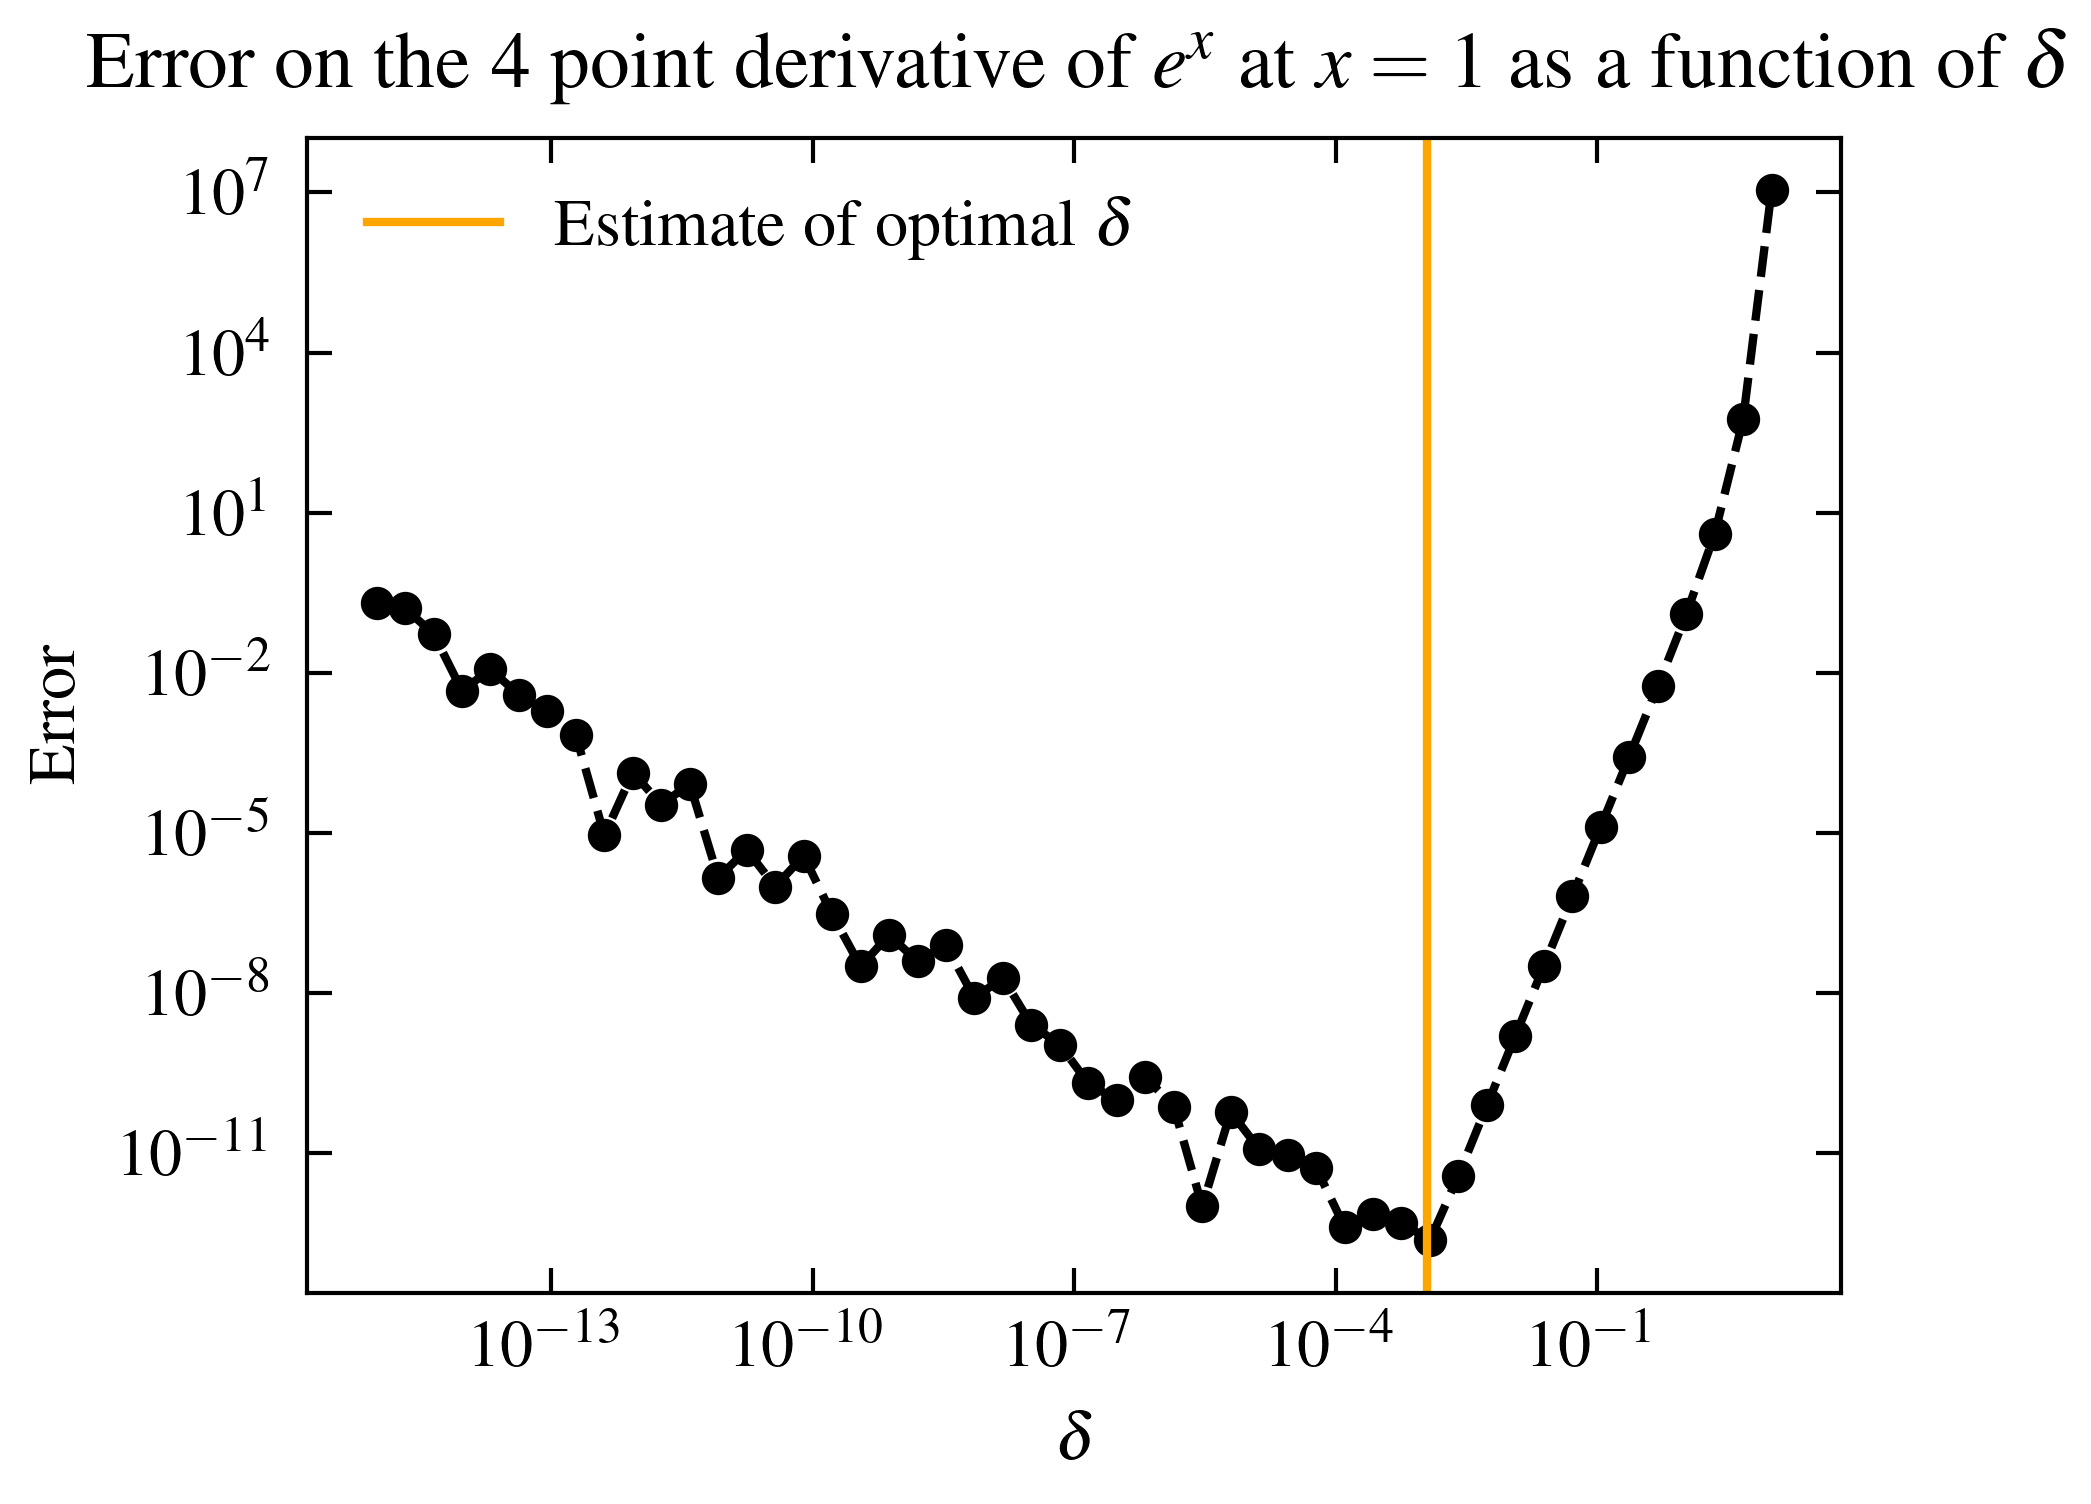

It looks like our estimate of delta is almost exactly the optimal delta. Good. 


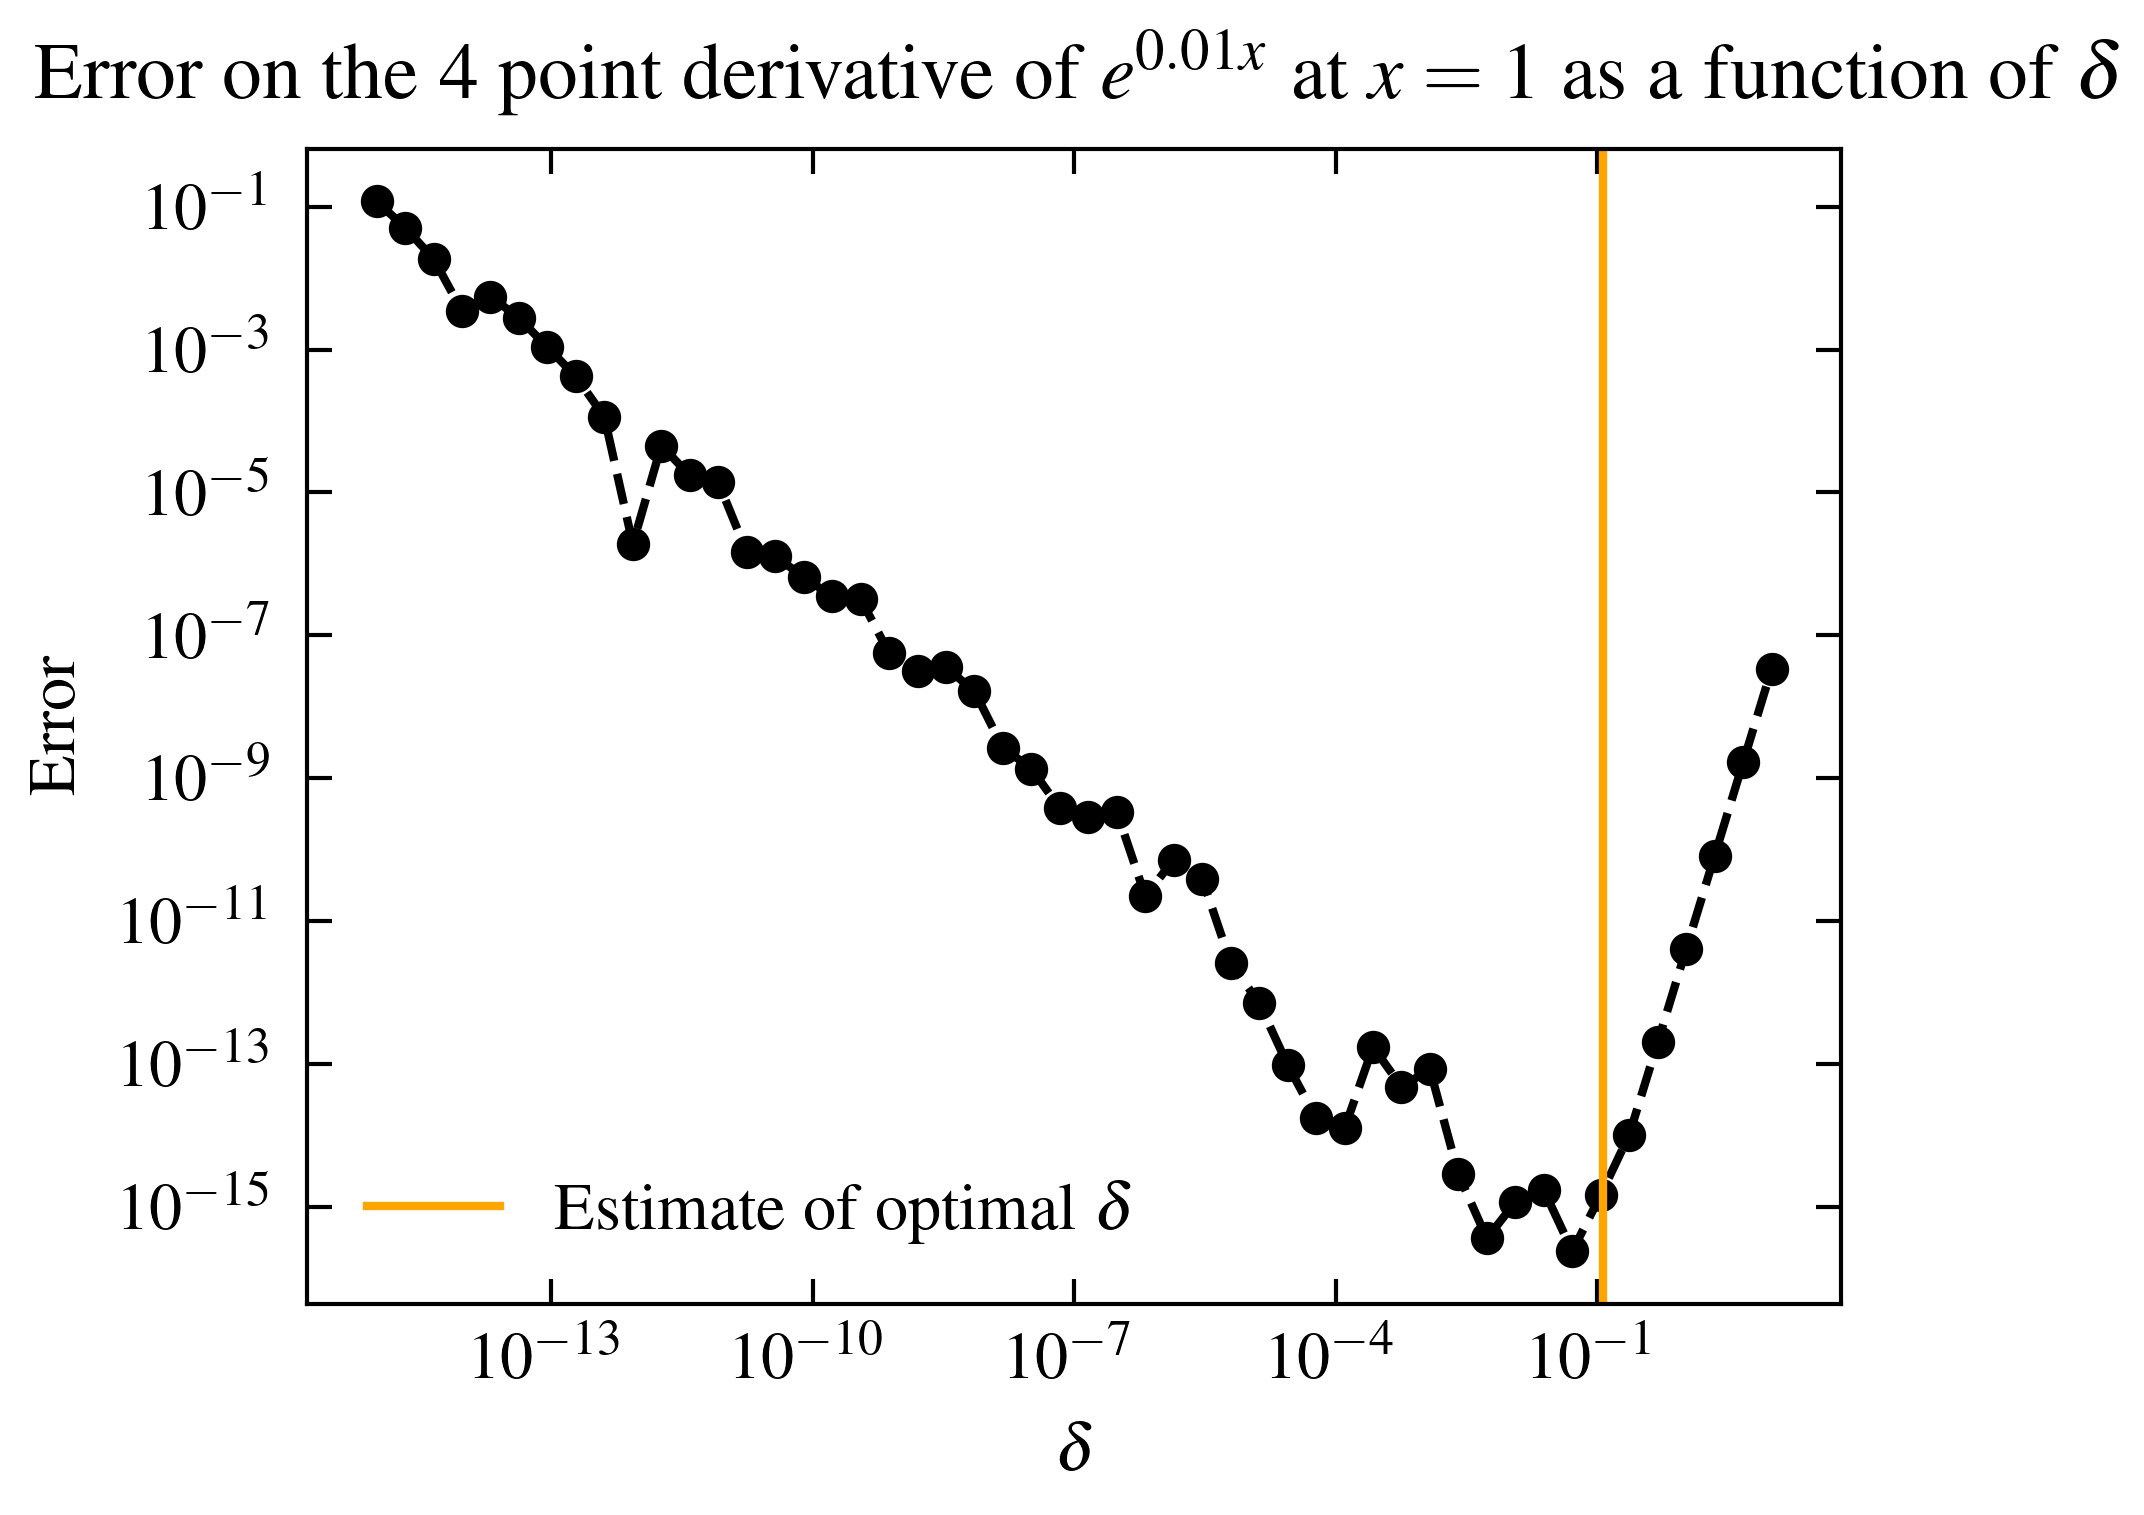

Now our estimate of delta is a bit off the optimal value, but the error on the derivative is about 10^-15
This is probably acceptable in most real world scenarios - its actually not too far from machine precision!


In [70]:
# Question 1 b)

# defining functions whose derivatives we want to approximate
def func1(x):
    return np.exp(x)

def func2(x):
    return np.exp(0.01*x)

# 4 point first derivative approximation
def deriv_4points(x, delta, f):
    return (8 * (f(x + delta)-f(x - delta))-(f(x + 2*delta)-f(x - 2*delta)))/(12*delta)

# fifth derivative approximation
def fifth_deriv(x, beta, f):
    return (-0.5*f(x-3*beta)+2*f(x-2*beta)-2.5*f(x-beta)+2.5*f(x+beta)-2*f(x+2*beta)+0.5*f(x+3*beta))/(beta**5)

# illustrating the relationship between delta and the error
delta = np.logspace(-15, 1, num = 50)
func1_diff = deriv_4points(1, delta, func1)
func2_diff = deriv_4points(1, delta, func2)

# compute errors for x = 1
error1 = np.abs(func1_diff - np.exp(1))
error2 = np.abs(func2_diff - 0.01*np.exp(0.01))

eps =np.finfo(float).eps
beta = 1e-1 # guess beta

# computing optimal deltas
delta1 = ((15*eps*func1(1))/(2*fifth_deriv(1, beta, func1 )))**(1/5)
delta2 = ((15*eps*func2(1))/(2*fifth_deriv(1, beta, func2 )))**(1/5)

# plotting
plt.plot(delta, error1,'.--')
plt.axvline(x = delta1, color= 'orange', label= 'Estimate of optimal $\\delta$')
plt.legend()
plt.xscale("log")
plt.yscale("log")
plt.xlabel('$\\delta$')
plt.ylabel('Error')
plt.title('Error on the 4 point derivative of $e^x$ at $x=1$ as a function of $\\delta$')
plt.show()
print('It looks like our estimate of delta is almost exactly the optimal delta. Good. ')
plt.plot(delta, error2,'.--')
plt.axvline(x = delta2, color= 'orange', label= 'Estimate of optimal $\\delta$')
plt.legend()
plt.xscale("log")
plt.yscale("log")
plt.xlabel('$\\delta$')
plt.ylabel('Error')
plt.title('Error on the 4 point derivative of $e^{0.01x}$ at $x=1$ as a function of $\\delta$')
plt.show()
print('Now our estimate of delta is a bit off the optimal value, but the error on the derivative is about 10^-15')
print('This is probably acceptable in most real world scenarios - its actually not too far from machine precision!')

# TODO: Nothing!

# Question 2

Let's start by estimating the optimal $dx$ for the centered derivative approximation of the first derivative of a function $f(x)$. The centered derivative is
$$f'(x)\approx \frac{f(x+dx)-f(x-dx)}{2dx}.$$
Taylor expand this up to to third order and include the error due to machine precision $(\varepsilon)$:

$$\frac{f(x+dx)-f(x-dx)}{2dx} \approx \frac{(f(x)+dxf'(x)+\frac{1}{2}dx^2f''(x)+\frac{1}{6}dx^3f'''(x)+\varepsilon f(x)+...)}{2dx}

-\frac{(f(x)-dxf'(x)+\frac{1}{2}dx^2f''(x))-\frac{1}{6}dx^3f'''(x)+\varepsilon f(x)+...)}{2dx}.$$

This gives:
\begin{equation}
\frac{f(x+dx)-f(x-dx)}{2dx} \approx f'(x) + \frac{1}{6}dx^2f'''(x) + \frac{\epsilon gf(x)}{dx}, 
\end{equation}

The last two terms of the left hand side are our error $\Delta$, which we want to minimize with respect to $dx$. Doing so eventually leads to 
\begin{equation}
dx \approx \left(\frac{3\epsilon f(x)}{f'''(x)}\right)^{1/3}.
\end{equation}

We again have the same issue here - we need the third derivative to approximate the first derivative. Let's use a central difference to approximate it, with an abitrary $\beta$. The third order central difference is given by 

\begin{equation}
f'''(x) = \frac{-f(x-2\beta) + 2f(x-\beta) -2 f(x+\beta) +f(x+2\beta)}{2\beta^3}.
\end{equation}

Again, the idea is to use this last equation with some non-optimal $\beta$ to estimate the third derivative and use this to estimate the optimal $dx$. Let's code this up.

In [47]:
# Question 2

# defining our differentiator 
def ndiff(fun, x, full = False):
    """ 
    Function that computes the first derivative of an abitrary function func at the point x
    Inputs:
        fun: function to differentiate
        x: float or array of floats to evaluate the derivative at
        full: bolean, if True return the optimal dx and an apporoximation of the error along the estimate of the derivative. Default = False

    Output:
        estimate of derivative
    """

    eps = 1e-16 # double digit precision
    h = 1e-1 # arbitrary, non-optimal dx

    third_derivative_estimate = (-fun(x-2*h)+2*fun(x-h)-2*fun(x+h)+fun(x+2*h))/(2*h**3)

    dx = np.abs(np.cbrt((3*eps*fun(x))/third_derivative_estimate)) # optimal dx
    err_approx = np.abs((dx**2*third_derivative_estimate)/6 + (eps*fun(x))/dx) # error estimate

    diff_approx = (fun(x+dx)-fun(x-dx))/(2*dx) # numerical derivative

    if full == False:
        return diff_approx
    
    else:
        return diff_approx, dx, err_approx
    
# some examples with numpy functions
print('For exp(x) at x = 1, the numerical derivative is', ndiff(np.exp, 1, full = True)[0], ', the actual value is', np.exp(1),'.')
print('The optimal dx and the error estimate are respectively',ndiff(np.exp, 1, full = True)[1],',',ndiff(np.exp, 1, full = True)[2],'.' )
print('The real error is', np.abs( ndiff(np.exp, 1, full = True)[0]-np.exp(1)),'.')
print('\n')
print('For sin(x) at x = 3, the numerical derivative is', ndiff(np.sin, 2, full = True)[0], ', the actual value is', np.cos(2),'.')
print('The optimal dx and the error estimate are respectively',ndiff(np.sin, 2, full = True)[1],',',ndiff(np.sin, 2, full = True)[2],'.' )
print('The real error is', np.abs( ndiff(np.sin, 2, full = True)[0]-np.cos(2)),'.')
print('\n')
print('For ln(x) at x = 2, the numerical derivative is', ndiff(np.log, 2, full = True)[0], ', the actual value is', 1/(2),'.')
print('The optimal dx and the error estimate are respectively',ndiff(np.log, 2, full = True)[1],',',ndiff(np.log, 2, full = True)[2],'.' )
print('The real error is', np.abs( ndiff(np.log, 2, full = True)[0]-1/(2)),'.')
print('\n')
print('We get really good numerical derivatives!')

# TODO: add more examples

For exp(x) at x = 1, the numerical derivative is 2.7182818284701553 , the actual value is 2.718281828459045 .
The optimal dx and the error estimate are respectively 6.6887546093590295e-06 , 6.095937107609482e-11 .
The real error is 1.1110223852028867e-11 .


For sin(x) at x = 3, the numerical derivative is -0.4161468365470239 , the actual value is -0.4161468365471424 .
The optimal dx and the error estimate are respectively 8.694051511398772e-06 , 1.5688268449413403e-11 .
The real error is 1.1851630787873546e-13 .


For ln(x) at x = 2, the numerical derivative is 0.5000000000028363 , the actual value is 0.5 .
The optimal dx and the error estimate are respectively 9.380926597693039e-06 , 1.1083348323987594e-11 .
The real error is 2.8362867610098874e-12 .


We get really good numerical derivatives!


# Question 3

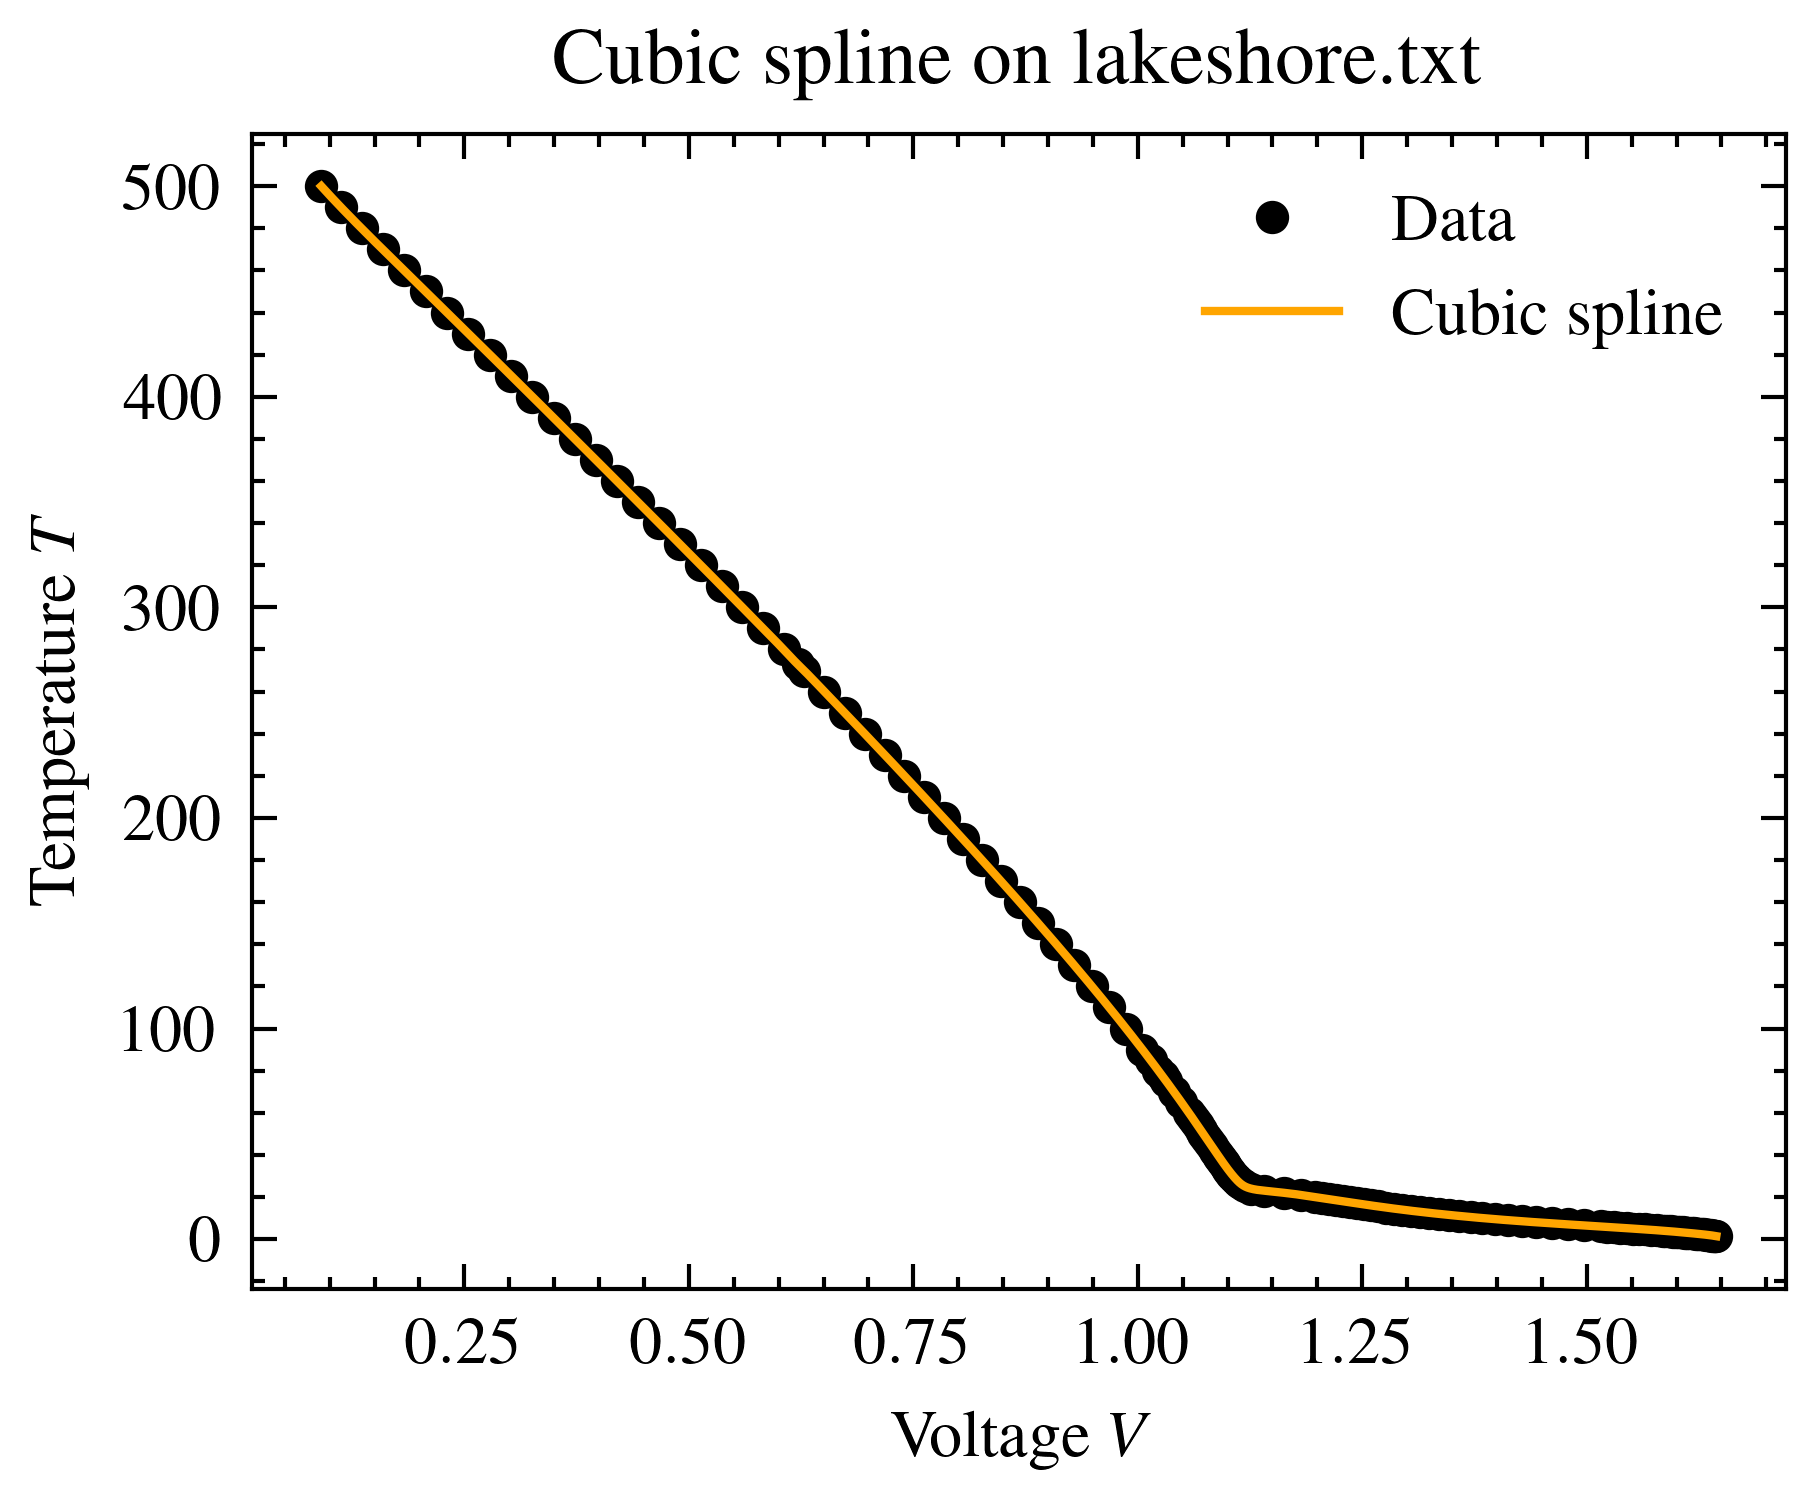

The very rough estimate of the root mean squared error is:  2.2146840208908296


In [72]:
# Question 3

def lakeshore(V, data):
    """
    Function that performs a cubic spline on the data and returns the 
    interpolated temperature and estimated mean squared error.

    Inputs:
        data: txt file of temperature vs voltage
        V: number or array of voltages to interpolate the temperature of

    Output: temperature, estimate of error
    """
    data = data[::-1] # sort in ascending order of voltage
    V_data = data[:,1]
    T_data = data[:,0]

    # cubic spline using scipy
    spline = interpolate.splrep(V_data, T_data)
    T = interpolate.splev(V, spline)

    # estimate of root mean squared error
    err = np.array([])
    for i in range(len(T)):
        all_diff = np.abs(T_data - T[i])
        min_diff = np.min(all_diff)

        err = np.append(err, min_diff)
    rmse = np.sqrt(np.mean(err**2))

    return T, rmse

# loading data

data = np.loadtxt('lakeshore.txt')

V_data = data[:,1]
T_data = data[:,0]

V_spline = np.linspace(V_data[0], V_data[-1], 10001)
T_spline = lakeshore(V_spline, data)[0]

# plotting
plt.plot(V_data, T_data, 'k.', label = "Data")
plt.plot(V_spline, T_spline, 'orange', label = 'Cubic spline')
plt.legend()
plt.xlabel('Voltage $V$')
plt.ylabel('Temperature $T$')
plt.title('Cubic spline on lakeshore.txt')
plt.show()

print('The very rough estimate of the root mean squared error is: ', lakeshore(V_spline, data)[1])
# TODO: refine the rmse estimate

# Question 4

<>:85: SyntaxWarning: invalid escape sequence '\c'
<>:85: SyntaxWarning: invalid escape sequence '\c'
/var/folders/3b/syn17q895x76ff4c_qs9zz400000gn/T/ipykernel_21072/366742179.py:85: SyntaxWarning: invalid escape sequence '\c'
  plt.plot(xx,y_true, label = '$\cos(x)$')


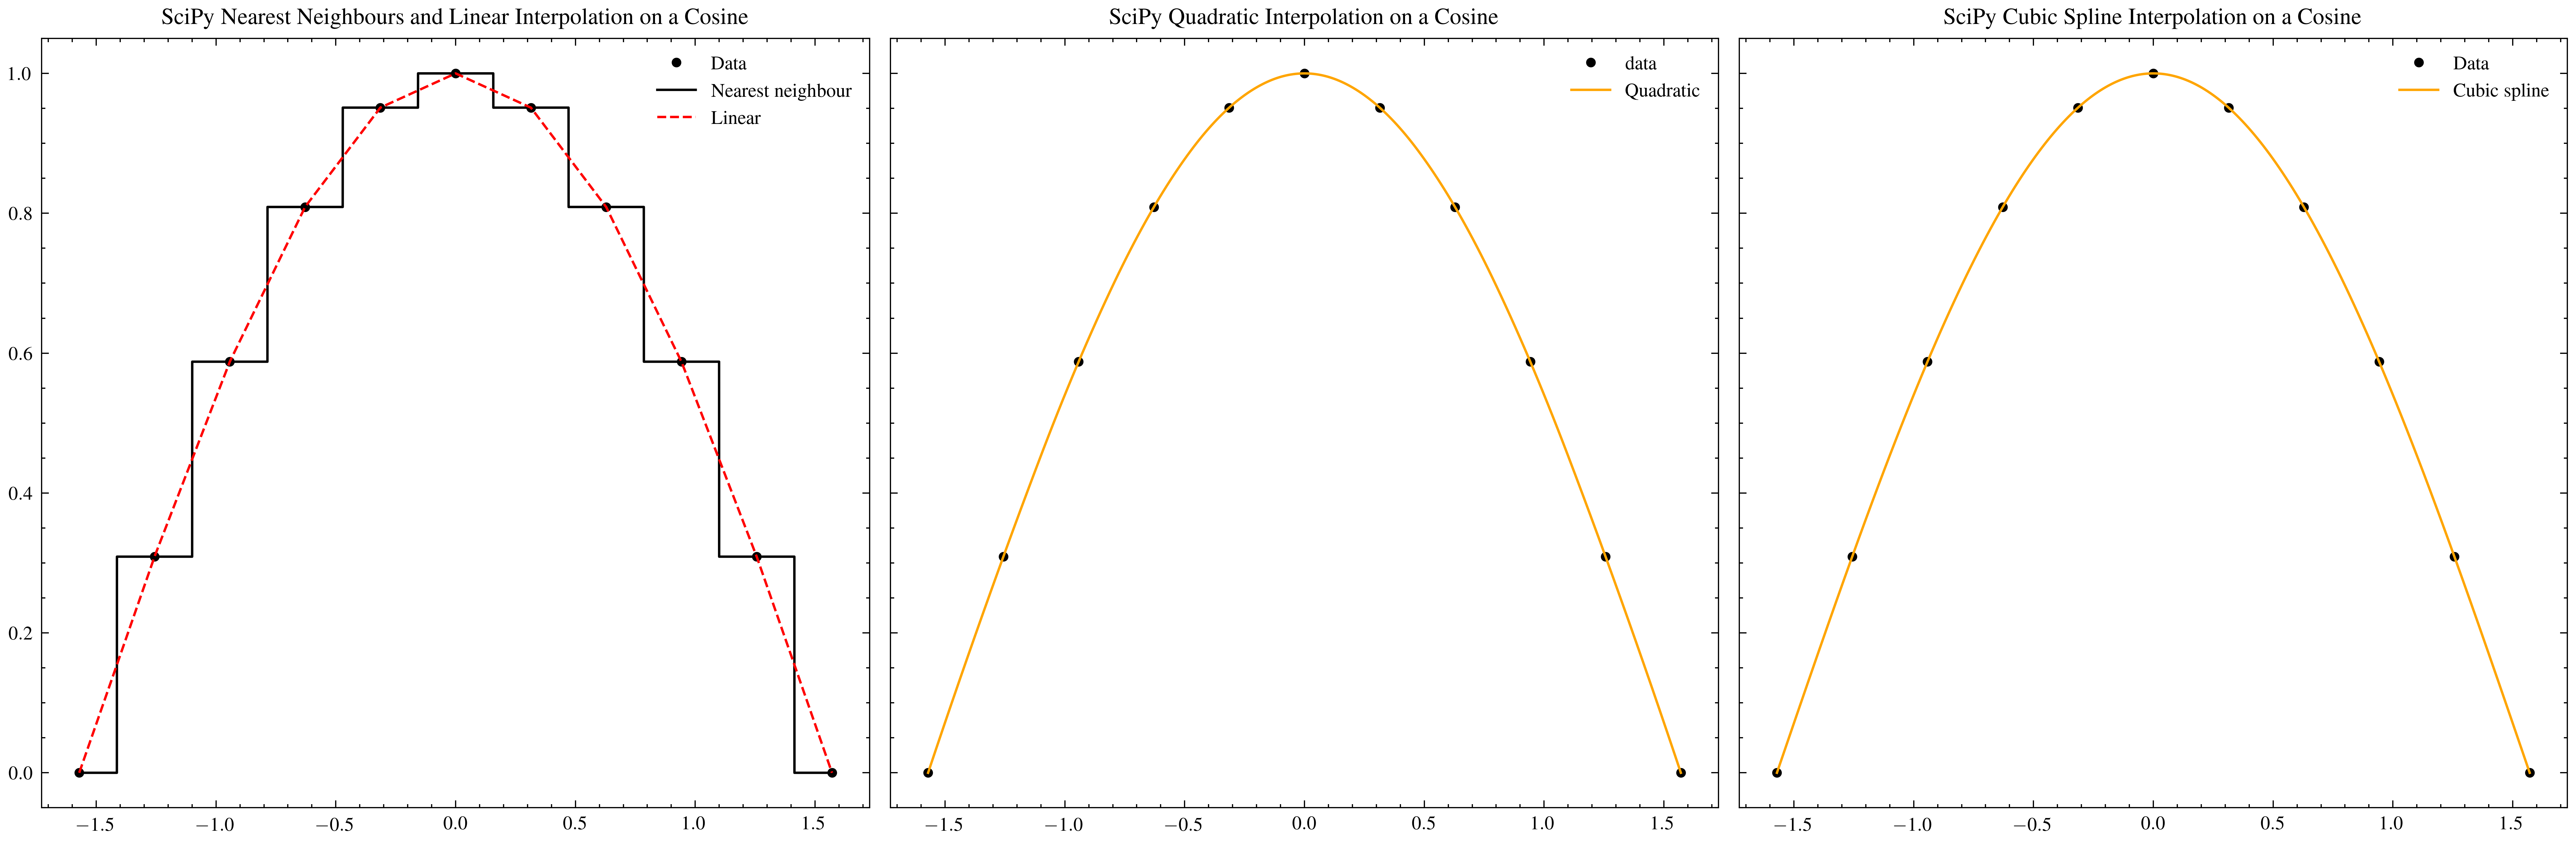

The root mean square error on the nearest neighbour interpolation is: 0.06408480522793188
The root mean square error on linear interpolation is: 0.006356773088623449
The root mean square error on the quadratic interpolation is: 0.00046974237922511956
The root mean square error on the cubic spline is 3.143112345155857e-05


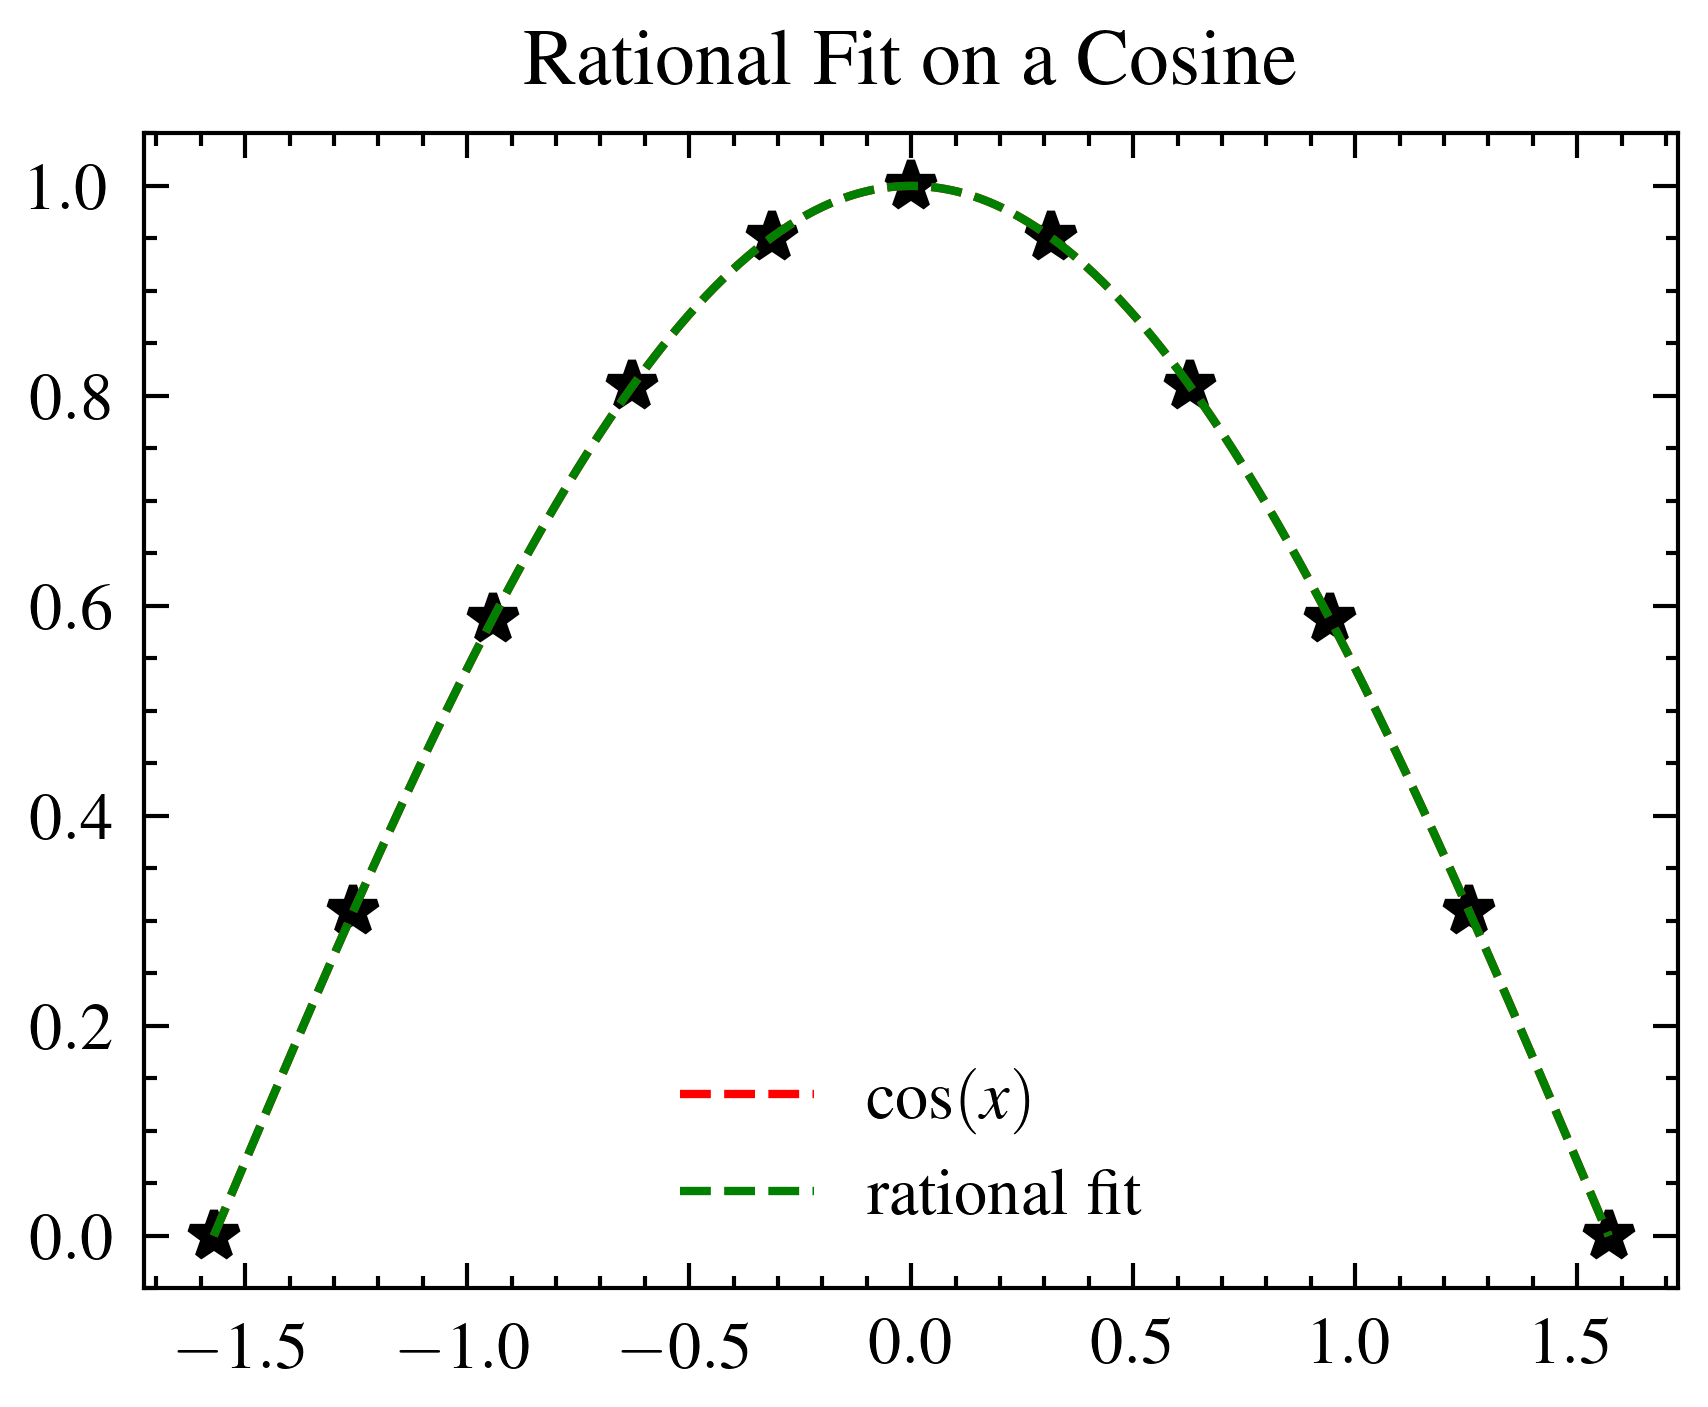

The root mean squared error on the rational interpolation is: 3.3944125413782572e-09


The root mean square error on the nearest neighbour interpolation is: 0.030468050238218504
The root mean square error on linear interpolation is: 0.003693250727139828
The root mean square error on the quadratic interpolation is: 0.00018100550776193794
The root mean square error on the cubic spline is 0.00011130720758332809


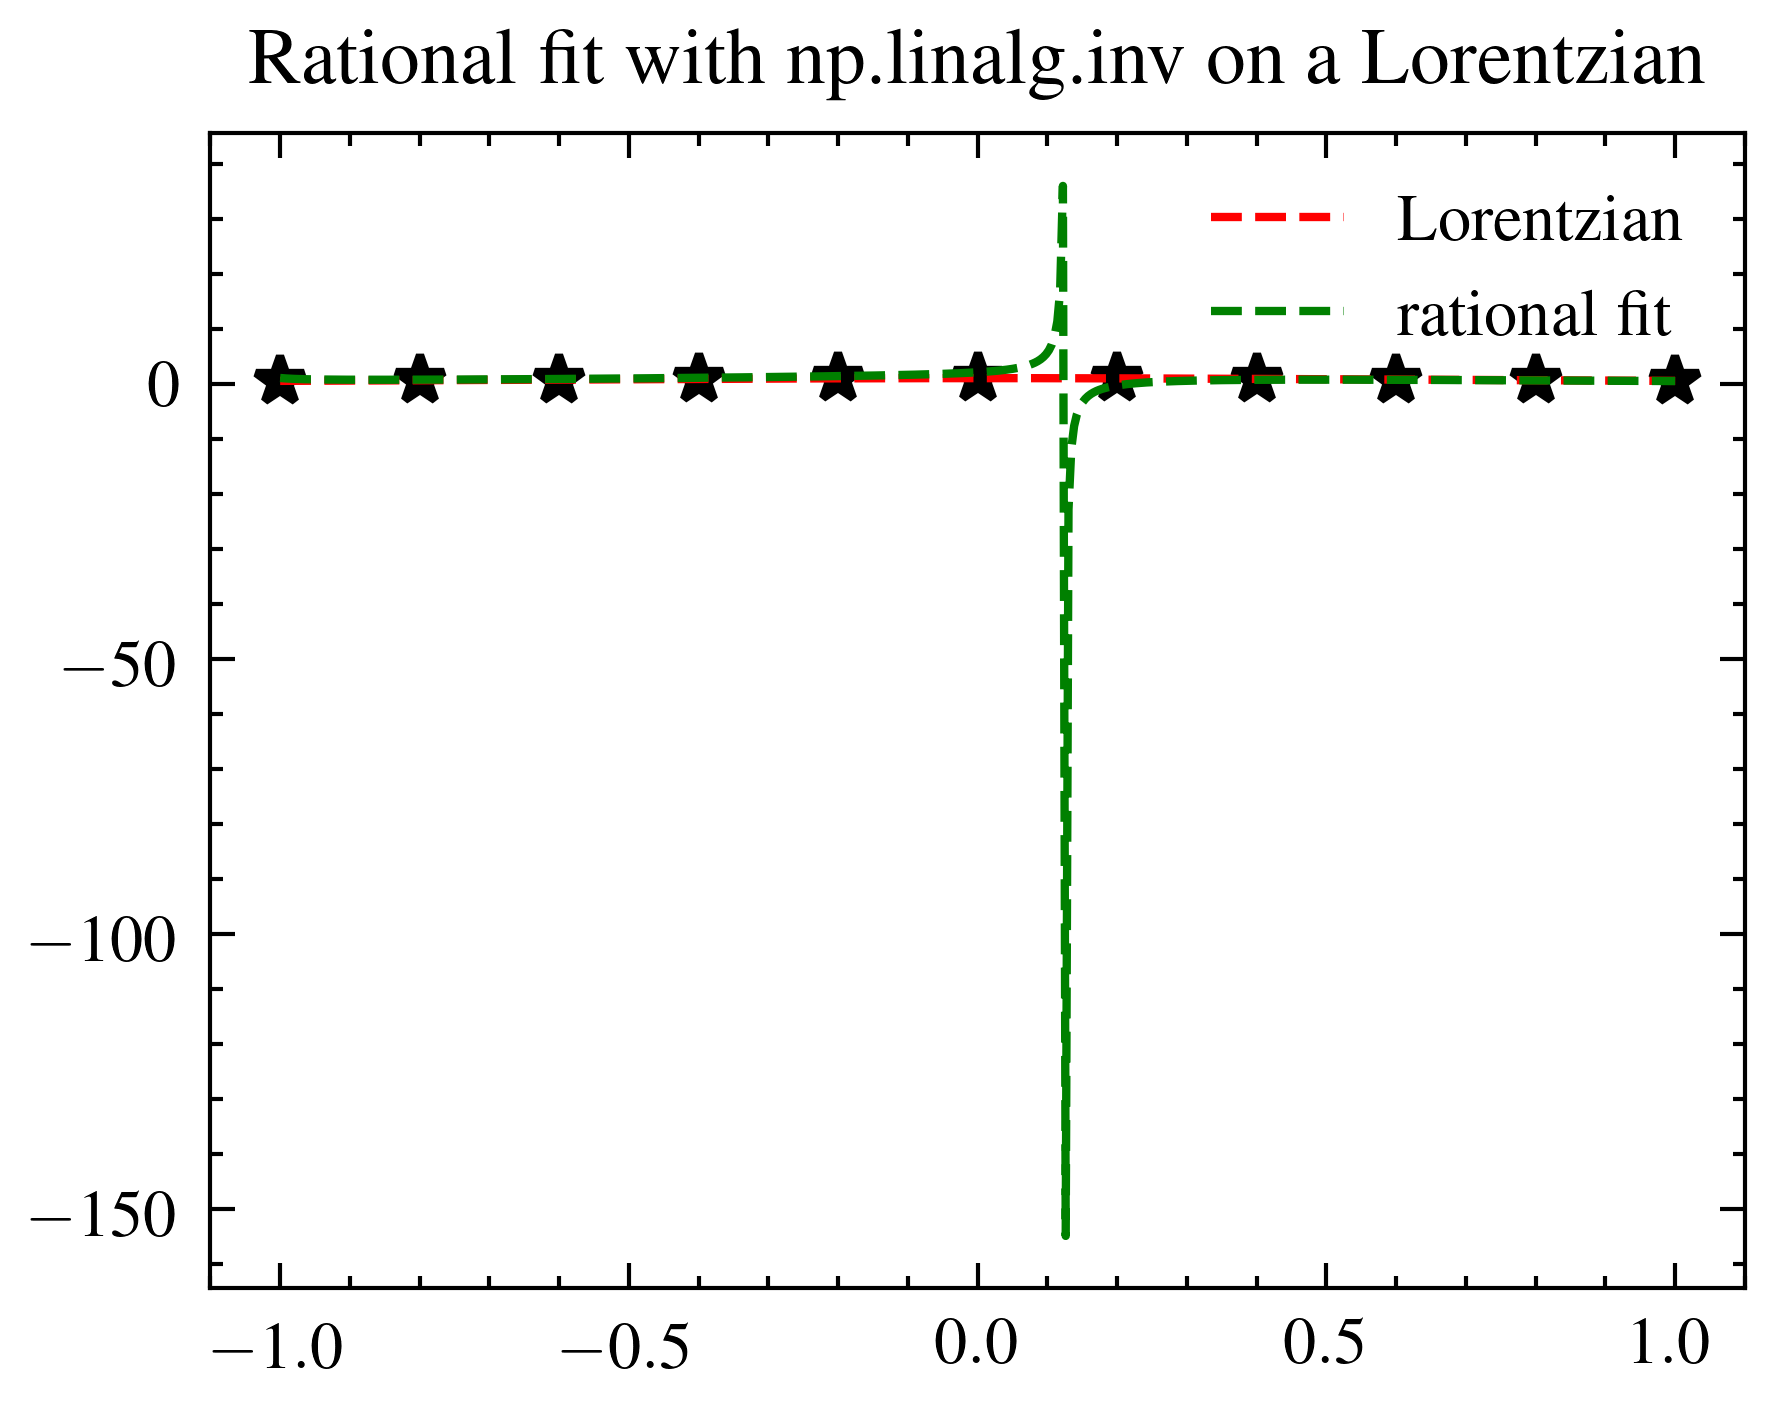

The root mean squared error on the rational interpolation is: 7.367145554142026
Wow that is really not good!


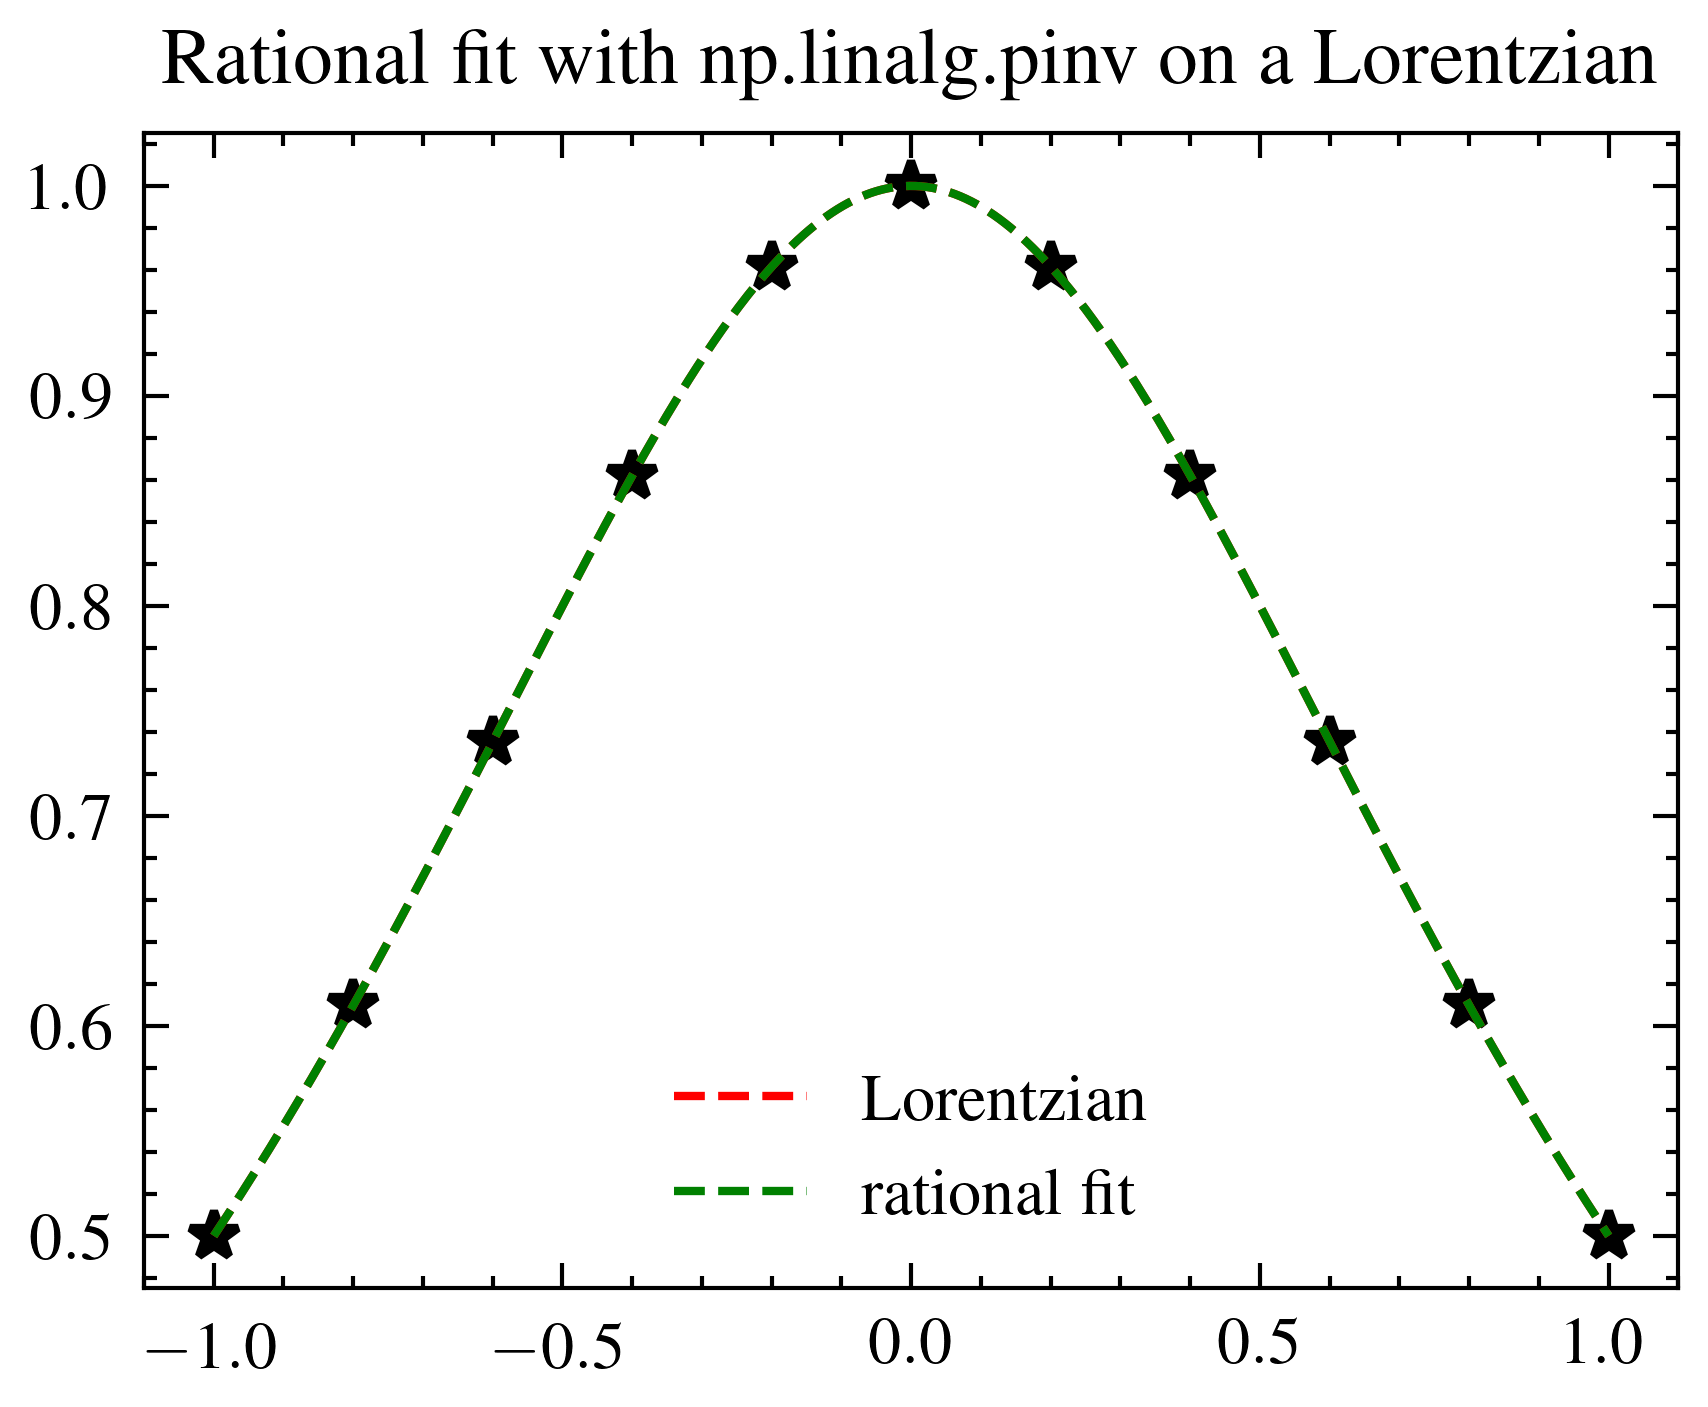

The root mean squared error on the rational interpolation is: 6.023151764353401e-16
This much better! Lets look at p and q to try and figure out what changed.
p and q obtained from np.linalg.inv: [ 2.0681171 -7.3125    -8.21875   -4.25      -4.125    ] [ -7.28125  -3.90625 -10.4375  -14.625    -6.25     -5.1875 ]
p and q obtained from np.linalg.pinv: [ 1.00000000e+00  1.77635684e-15 -3.75000000e-01 -1.63757896e-15
  1.25000000e-01] [ 2.88657986e-15  6.25000000e-01 -7.77156117e-16 -2.50000000e-01
 -6.66133815e-16  1.25000000e-01]


In [7]:
# Question 4

# scipy interpolation for cosine between -pi/2 and pi/2 using 11 points

x = np.linspace(-np.pi/2, np.pi/2, 11)
y = np.cos(x)
x_fine = np.linspace(-np.pi/2, np.pi/2, 10001)

# nearest neighbours interpolation
nearest = interpolate.interp1d(x, y, kind = 'nearest')
rmse_nearest = np.sqrt(np.mean((np.cos(x_fine) - nearest(x_fine))**2)) # root mean squared error estimate

# linear interpolation
linear = interpolate.interp1d(x, y, kind = 'linear')
rmse_linear = np.sqrt(np.mean((np.cos(x_fine) - linear(x_fine))**2))

# Quadratic interpolation
quadratic = interpolate.interp1d(x, y, kind = 'quadratic')
rmse_quadratic = np.sqrt(np.mean((np.cos(x_fine) - quadratic(x_fine))**2))

# Cubic spline 
cubic = interpolate.interp1d(x, y, kind = 'cubic')
rmse_cubic = np.sqrt(np.mean((np.cos(x_fine) - cubic(x_fine))**2))

# plotting
fig, ax = plt.subplots(1, 3, figsize = (15,5), sharey = 'row')
ax[0].plot(x, y, 'k.', label = 'Data')
ax[0].plot(x_fine, nearest(x_fine), label = 'Nearest neighbour')
ax[0].plot(x_fine, linear(x_fine), label = 'Linear')
ax[0].set_title('SciPy Nearest Neighbours and Linear Interpolation on a Cosine')
ax[0].legend(loc = 'upper right')

ax[1].plot(x, y, 'k.', label = 'data')
ax[1].plot(x_fine, quadratic(x_fine), color = 'orange', label = 'Quadratic' )
ax[1].set_title('SciPy Quadratic Interpolation on a Cosine')
ax[1].legend(loc = 'upper right')

ax[2].plot(x, y, 'k.', label = 'Data')
ax[2].plot(x_fine, cubic(x_fine), color = 'orange', label = 'Cubic spline')
ax[2].set_title('SciPy Cubic Spline Interpolation on a Cosine')
ax[2].legend(loc = 'upper right')

plt.tight_layout()
plt.show()

print("The root mean square error on the nearest neighbour interpolation is:", rmse_nearest)
print("The root mean square error on linear interpolation is:", rmse_linear)
print("The root mean square error on the quadratic interpolation is:", rmse_quadratic)
print("The root mean square error on the cubic spline is", rmse_cubic)

# Code for rational interpolation (taken from class)

def rat_eval(p,q,x):
    top=0
    for i in range(len(p)):
        top=top+p[i]*x**i
    bot=1
    for i in range(len(q)):
        bot=bot+q[i]*x**(i+1)
    return top/bot

def rat_fit(x,y,n,m):
    assert(len(x)==n+m-1)
    assert(len(y)==len(x))
    mat=np.zeros([n+m-1,n+m-1])
    for i in range(n):
        mat[:,i]=x**i
    for i in range(1,m):
        mat[:,i-1+n]=-y*x**i
    pars=np.dot(np.linalg.inv(mat),y)
    p=pars[:n]
    q=pars[n:]
    return p,q

# Rat fit for cosine bewteen -pi/2 and pi/2
n=5
m=7
x=np.linspace(-np.pi/2,np.pi/2,n+m-1)
y=np.cos(x)
p,q=rat_fit(x,y,n,m)
xx=np.linspace(x[0],x[-1],500)
y_true=np.cos(xx)
pred=rat_eval(p,q,xx)
plt.clf();plt.plot(x,y,'*')
plt.plot(xx,y_true, label = '$\cos(x)$')
plt.plot(xx,pred, 'g--', label = 'rational fit')
plt.title('Rational Fit on a Cosine')
plt.legend()
plt.show()


rmse_rat = np.sqrt(np.mean((y_true - pred)**2))
print("The root mean squared error on the rational interpolation is:", rmse_rat)


# Scipy interpolation for a lorentzian between -1 and 1

x = np.linspace(-1, 1, 11)

def lorentzian(x):
    return 1/(1+x**2)

y = lorentzian(x)
x_fine = np.linspace(-1, 1, 1001)

# Nearest neighbours
nearest = interpolate.interp1d(x, y, kind = 'nearest')
rmse_nearest = np.sqrt(np.mean((lorentzian(x_fine) - nearest(x_fine))**2))

# Linear interpolation
linear = interpolate.interp1d(x, y, kind = 'linear')
rmse_linear = np.sqrt(np.mean((lorentzian(x_fine) - linear(x_fine))**2))

# Quadratic interpolation
quadratic = interpolate.interp1d(x, y, kind = 'quadratic')
rmse_quadratic = np.sqrt(np.mean((lorentzian(x_fine) - quadratic(x_fine))**2))

# Cubic spline 
cubic = interpolate.interp1d(x, y, kind = 'cubic')
rmse_cubic = np.sqrt(np.mean((lorentzian(x_fine) - cubic(x_fine))**2))

fig, ax = plt.subplots(1,3,figsize=(25,8), sharey='row')
ax[0].plot(x,y,'k.')
ax[0].plot(x_fine,nearest(x_fine), label = 'Nearest neighbour')
ax[0].plot(x_fine,linear(x_fine), label = 'Linear')
ax[0].plot(x_fine, lorentzian(x_fine), label = 'Lorentzian')
ax[0].set_title('SciPy Nearest Neighbours and Linear Interpolation on a Lorentzian')
ax[0].legend(loc ='best')


ax[1].plot(x,y,'k.')
ax[1].plot(x_fine,quadratic(x_fine), 'r', label = 'Quadratic')
ax[1].set_title('SciPy Quadratic Interpolation on a Lorentzian')
ax[1].legend(loc ='best')

ax[2].plot(x,y,'k.')
ax[2].plot(x_fine,cubic(x_fine), 'r', label = 'Cubic spline')
ax[2].set_title('SciPy Cubic Spline Interpolation on a Lorentzian')
ax[2].legend(loc ='best')

plt.tight_layout()
plt.show()

print("The root mean square error on the nearest neighbour interpolation is:", rmse_nearest)
print("The root mean square error on linear interpolation is:", rmse_linear)
print("The root mean square error on the quadratic interpolation is:", rmse_quadratic)
print("The root mean square error on the cubic spline is", rmse_cubic)

# rational function fit on the lorentzian

n=5
m=7
x=np.linspace(-1,1,n+m-1)
y=lorentzian(x)
p,q=rat_fit(x,y,n,m)
xx=np.linspace(x[0],x[-1],500)
y_true=lorentzian(xx)
pred=rat_eval(p,q,xx)
plt.clf();plt.plot(x,y,'*')
plt.plot(xx,y_true, label = 'Lorentzian')
plt.plot(xx,pred, 'g--', label = 'rational fit')
plt.title('Rational fit with np.linalg.inv on a Lorentzian')
plt.legend()
plt.show()

p_inv = p
q_inv = q

rmse_rat = np.sqrt(np.mean((y_true - pred)**2))
print("The root mean squared error on the rational interpolation is:", rmse_rat)
print('Wow that is really not good!')

# Let's try using np.linalag.pinv in the rational fit 

def rat_fit_new(x,y,n,m):
    assert(len(x)==n+m-1)
    assert(len(y)==len(x))
    mat=np.zeros([n+m-1,n+m-1])
    for i in range(n):
        mat[:,i]=x**i
    for i in range(1,m):
        mat[:,i-1+n]=-y*x**i
    pars=np.dot(np.linalg.pinv(mat),y)
    p=pars[:n]
    q=pars[n:]
    return p,q

n=5
m=7
x=np.linspace(-1,1,n+m-1)
y=lorentzian(x)
p,q=rat_fit_new(x,y,n,m)
xx=np.linspace(x[0],x[-1],500)
y_true=lorentzian(xx)
pred=rat_eval(p,q,xx)
plt.clf();plt.plot(x,y,'*')
plt.plot(xx,y_true, label = 'Lorentzian')
plt.plot(xx,pred, 'g--', label = 'rational fit')
plt.title('Rational fit with np.linalg.pinv on a Lorentzian')
plt.legend()
plt.show()

p_pinv = p
q_pinv = q

rmse_rat = np.sqrt(np.mean((y_true - pred)**2))
print("The root mean squared error on the rational interpolation is:", rmse_rat)
print('This much better! Lets look at p and q to try and figure out what changed.')
print('p and q obtained from np.linalg.inv:', p_inv, q_inv)
print('p and q obtained from np.linalg.pinv:', p_pinv, q_pinv)

# TODO: expalin better the difference between np.inv and np.pinv

There's an enormous difference between the $p$'s and $q$'s obtained using np.linalg.inv (inv) and np.linalg.pinv (pinv). Most of the entries obtained from inv are greater than 1, which is not normal, while the entries obtained from pinv are all less than 1, with most of them being zero. This is probably because the matrix in that case is singular (determinant is zero or close to zero), and np.linalg.pinv is able to handle that.

In [8]:
print('hello')

hello
